In [1]:
video_ids = [ 381, 374, 380, 377, 379, 378, 375, 376 ]

In [6]:
frames = {
    374: [94728, 99888],
    375: [73620, 167652],
    376: [44280, 163920, 169620],
    377: [205776],
    378: [74820],
    379: [39996, 75648, 112500, 130080, 130800],
    380: [43596, 
          #103548, # a bit blurry, remove if possible
         #125184, # remove if necessary
          125832],
    381: [89988, 146832, 164784, 165276]
}

In [4]:
# visualize these frames
from esper.prelude import *
from esper.stdlib import simple_result

In [7]:
materialized_result = []
for video_id in video_ids:
    for f in frames[video_id]:
        materialized_result.append({
            'video': video_id,
            'min_frame': f,
            'objects': []
        })
esper_widget(simple_result(materialized_result, 'frames'))

VGridWidget(jsglobals={'bucket': 'esper', 'schema': [['Identity', ['id', 'name']], ['Genre', ['id', 'name']], …

In [11]:
import matplotlib.pyplot as plt
import cv2

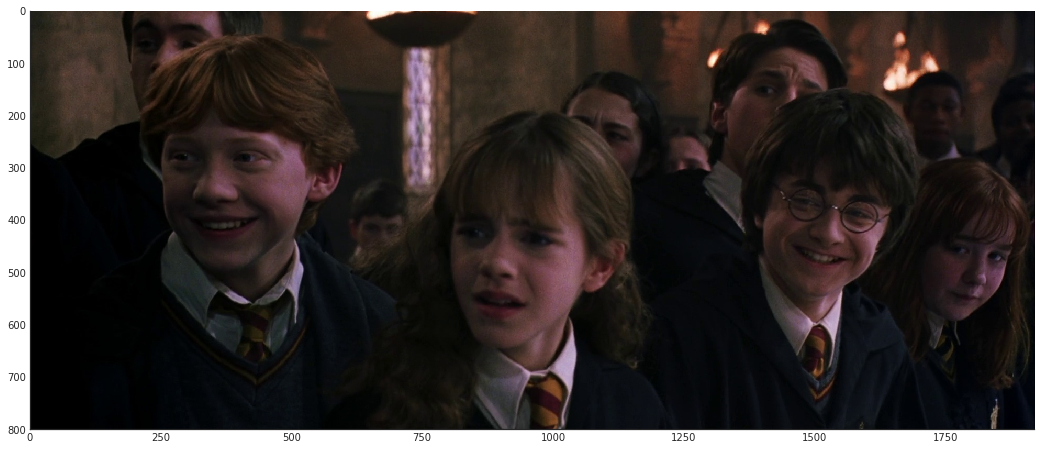

In [12]:
plt.imshow(cv2.cvtColor(load_frame(Video.objects.get(id=374), 
                      94728, 
                      []),
                       cv2.COLOR_BGR2RGB))

In [13]:
from PIL import Image as pimg

In [14]:
im = pimg.fromarray(cv2.cvtColor(load_frame(Video.objects.get(id=374), 
                      94728, 
                      []),
                       cv2.COLOR_BGR2RGB))

In [15]:
im.save('test.png','png')

In [18]:
for idx, frame in tqdm(enumerate(materialized_result), total=len(materialized_result)):
    video = Video.objects.get(id=frame['video'])
    im = pimg.fromarray(
        cv2.cvtColor(load_frame(video, frame['min_frame'], []),
                     cv2.COLOR_BGR2RGB))
    im.save('{:02d}_harry_ron_hermione.png'.format(idx), 'png')